In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

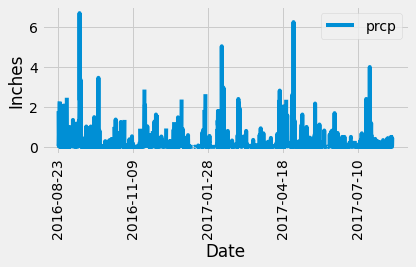

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent_datetime = dt.date(2017, 8, 23)
one_year_date = most_recent_datetime - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date).all()
prcp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_data)
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
stations_total = session.query(Measurement).group_by(Measurement.station).count()
stations_total

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# find he most active station id 
first_id = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
station_id = first_id[0]
station_id

'USC00519281'

In [16]:
lowest_temperature = session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == station_id).all()
lowest_temperature

[('USC00519281', 54.0)]

In [17]:
highest_temperature = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == station_id).all()
highest_temperature

[('USC00519281', 85.0)]

In [18]:
average_temperature = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == station_id).all()
average_temperature

[('USC00519281', 71.66378066378067)]

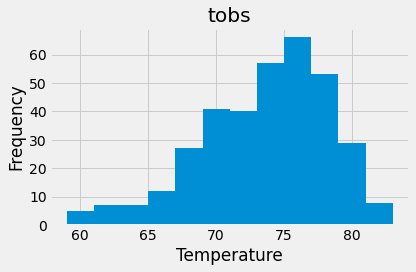

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.tobs, Measurement.station).filter(Measurement.date >= one_year_date).filter(Measurement.station == station_id).all()
temperature_data

# Save the query results as a Pandas DataFrame and set the index to the station column
df2 = pd.DataFrame(temperature_data)
df2.set_index('station', inplace=True)


#Plot results as a histogram
df2.hist(bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Close session

In [20]:
# Close Session
session.close()